In [6]:
pip install pandas plotnine

     |████████████████████████████████| 4.7 MB 3.4 MB/s eta 0:00:01
     |████████████████████████████████| 63 kB 12.1 MB/s eta 0:00:01
     |████████████████████████████████| 111 kB 49.7 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [134]:
conda install -c conda-forge cartopy

Solving environment: done

## Package Plan ##

  environment location: /opt/anaconda3

  added / updated specs:
    - cartopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    cartopy-0.18.0             |   py38hf1ba7ce_1         1.7 MB
    shapely-1.7.1              |   py38h9250791_0         376 KB
    ------------------------------------------------------------
                                           Total:         2.0 MB

The following NEW packages will be INSTALLED:

  cartopy            pkgs/main/osx-64::cartopy-0.18.0-py38hf1ba7ce_1
  shapely            pkgs/main/osx-64::shapely-1.7.1-py38h9250791_0



cartopy-0.18.0       | 1.7 MB    | ##################################### | 100% 
shapely-1.7.1        | 376 KB    | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done

Note: you may need to restart the

In [226]:
conda install -c conda-forge basemap-data-hires

Solving environment: done

## Package Plan ##

  environment location: /opt/anaconda3

  added / updated specs:
    - basemap-data-hires


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    basemap-data-hires-1.2.2   |                0       105.4 MB  conda-forge
    ------------------------------------------------------------
                                           Total:       105.4 MB

The following NEW packages will be INSTALLED:

  basemap-data-hires conda-forge/osx-64::basemap-data-hires-1.2.2-0



basemap-data-hires-1 | 105.4 MB  | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done

Note: you may need to restart the kernel to use updated packages.


In [285]:
import numpy as np
import pandas as pd
from plotnine import *
import random

In [304]:
from mpl_toolkits.basemap import Basemap 

In [305]:
data = pd.read_csv("worldcities.csv")
data

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
0,Tokyo,Tokyo,35.6897,139.6922,Japan,JP,JPN,Tōkyō,primary,37977000.0,1392685764
1,Jakarta,Jakarta,-6.2146,106.8451,Indonesia,ID,IDN,Jakarta,primary,34540000.0,1360771077
2,Delhi,Delhi,28.6600,77.2300,India,IN,IND,Delhi,admin,29617000.0,1356872604
3,Mumbai,Mumbai,18.9667,72.8333,India,IN,IND,Mahārāshtra,admin,23355000.0,1356226629
4,Manila,Manila,14.6000,120.9833,Philippines,PH,PHL,Manila,primary,23088000.0,1608618140
...,...,...,...,...,...,...,...,...,...,...,...
40996,Tukchi,Tukchi,57.3670,139.5000,Russia,RU,RUS,Khabarovskiy Kray,NaN,10.0,1643472801
40997,Numto,Numto,63.6667,71.3333,Russia,RU,RUS,Khanty-Mansiyskiy Avtonomnyy Okrug-Yugra,NaN,10.0,1643985006
40998,Nord,Nord,81.7166,-17.8000,Greenland,GL,GRL,Sermersooq,NaN,10.0,1304217709
40999,Timmiarmiut,Timmiarmiut,62.5333,-42.2167,Greenland,GL,GRL,Kujalleq,NaN,10.0,1304206491


In [306]:
#Keep the data I need. 
df = data.copy()
df = data[['lat', 'lng']]
df.head()

,lat,lng
0,35.6897,139.6922
1,-6.2146,106.8451
2,28.6600,77.2300
3,18.9667,72.8333
4,14.6000,120.9833


In [307]:
lat=[]
for i in range(len(df.values)):
    lat.append(df.values[i][0])
    i+=1

In [308]:
lng = []
for i in range(len(df.values)):
    lng.append(df.values[i][1])
    i+=1

In [309]:
#https://stackoverflow.com/questions/4913349/haversine-formula-in-python-bearing-and-distance-between-two-gps-points (Links to an external site.)

from math import radians, cos, sin, asin, sqrt

def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance in kilometers between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371 # Radius of earth in kilometers. Use 3956 for miles. Determines return value units.
    return c * r

In [311]:
def centers(df,k):

    pts = [np.array(pt) for pt in zip(lat,lng)] 
    centers = random.sample(pts, k)

    old_cluster_ids, cluster_ids = None, [] 

    while cluster_ids != old_cluster_ids:
        old_cluster_ids = list(cluster_ids)
        cluster_ids = []
        for pt in pts:
            min_cluster = -1
            min_dist = float('inf')
            for i, c in enumerate(centers):
                dist = haversine(pt[0],pt[1],c[0],c[1]) #My modification here
                if dist<min_dist:
                    min_cluster = i
                    min_dist = dist
            cluster_ids.append(min_cluster)
        df['cluster']= cluster_ids
        cluster_pts = [[pt for pt, cluster in zip(pts, cluster_ids) if cluster == match]
                       for match in range(k)]
        centers = [sum(pts)/len(pts) for pts in cluster_pts]
        #https://matplotlib.org/basemap/users/robin.html
    plt.figure(figsize=(12,6))
    map = Basemap(projection='robin',lat_0=0, lon_0=-100,resolution='c')
    map.drawmapboundary(fill_color='white') #The blue color in the HW instruction is hard to see the points, so I change the map color.
    x,y = map(lng,lat)
    cluster = df['cluster'].tolist()
    map.scatter(x, y, c = cluster,cmap = 'jet',s = 0.6, alpha = 0.3)
    map.drawcoastlines()
    plt.show()

<ipython-input-311-b23bdc214fbc>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


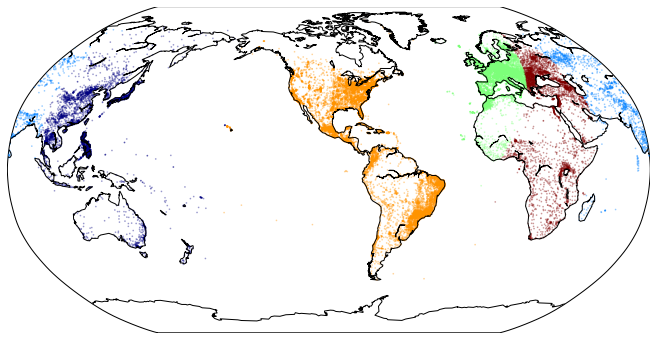

In [312]:
centers(df,5)#map1

<ipython-input-311-b23bdc214fbc>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


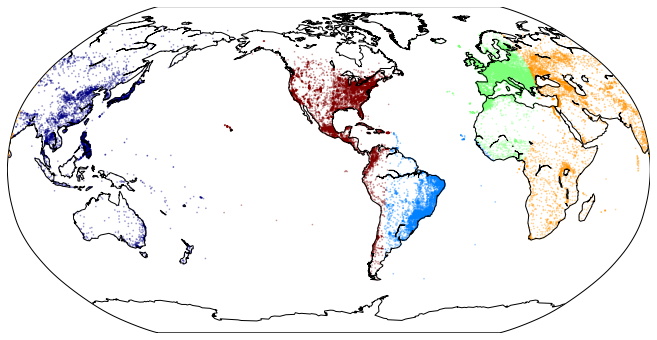

In [315]:
centers(df,5)#map2

<ipython-input-311-b23bdc214fbc>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


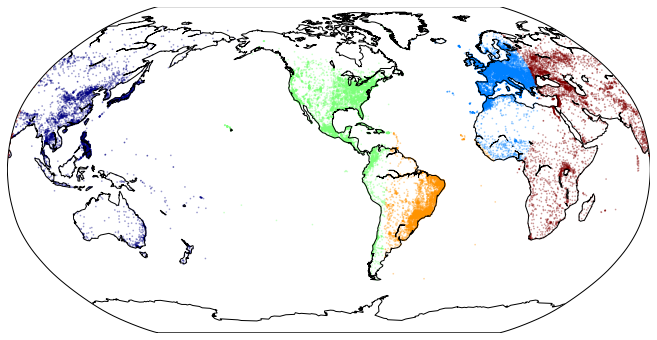

In [317]:
centers(df,5)#map3

<ipython-input-311-b23bdc214fbc>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


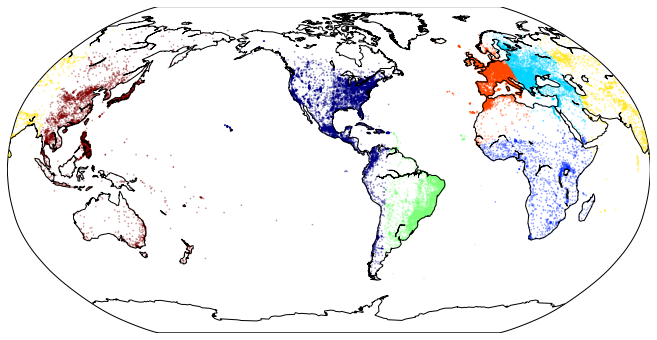

In [316]:
centers(df,7)#map4

<ipython-input-311-b23bdc214fbc>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


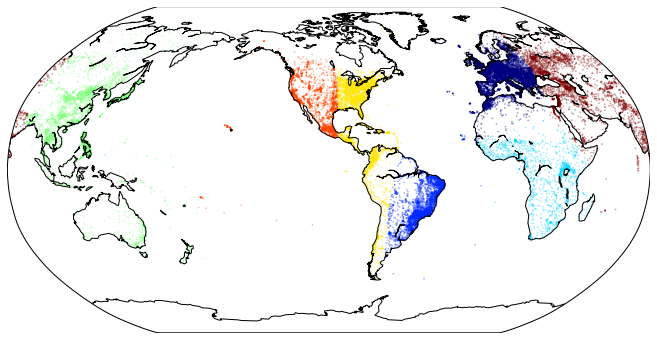

In [318]:
centers(df,7)#map5

<ipython-input-311-b23bdc214fbc>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


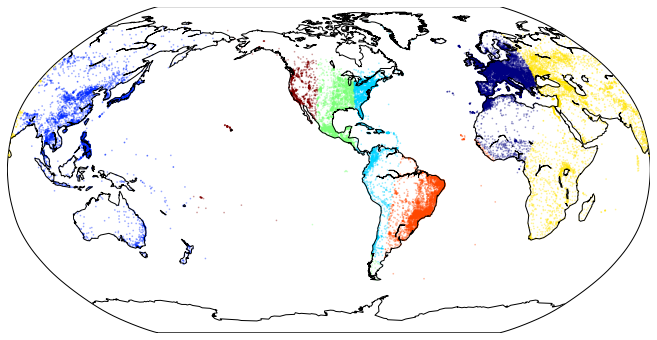

In [319]:
centers(df,7)#map6

<ipython-input-311-b23bdc214fbc>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


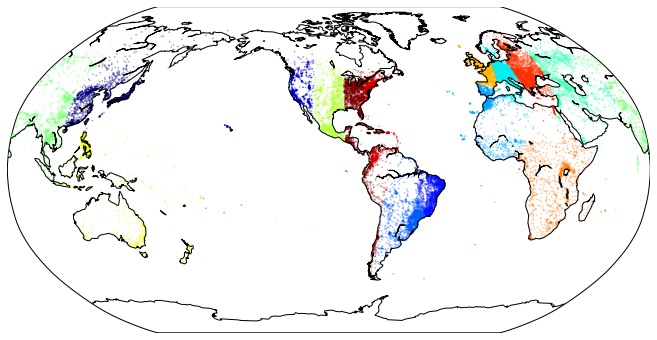

In [320]:
centers(df,15)#map7

<ipython-input-311-b23bdc214fbc>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


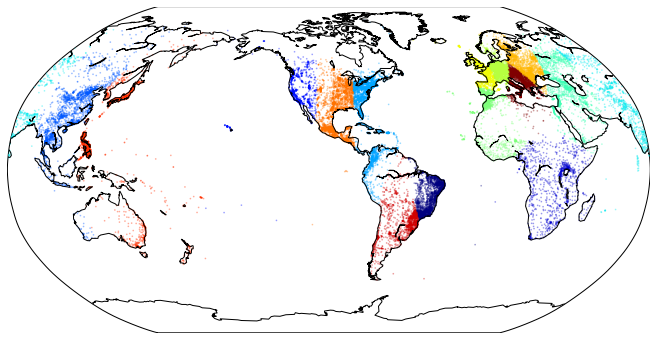

In [322]:
centers(df,15)#map8

<ipython-input-311-b23bdc214fbc>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


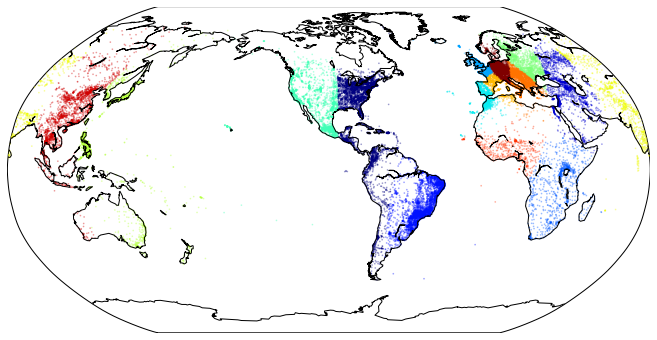

In [323]:
centers(df,15)#map9 

Run it several times to get a sense of the variation of clusters for each k (share your plots) (5 points); comment briefly on the diversity of results for each k. (5 points)
1) I run k = 5 three times. As showing in the map, the division of cities in Asia and Europe change a lot(map 1 has four divisions in this two areas; map 2 and 3 has three divisions). Besides, South America and North America are separated in the map 2&3. 
2) I run k =7 three times. As showing in the map, the clusters changing is focusing on the divisions of Europe and North America(map4 has different divisions of Europed with map5&6; the division of North America is different in all three maps).
3) I run k = 15 three times. As showing in the map, the diversity of centers is varied in the three maps. For map7, there are divisions in North America, whereas in map 8&9, the separation in North America decreased, similarly to South America and Africa; Oceania and South Asia have more separation of cities. 
